<font color='green' size = 5> Trace Estimation: 1 Clean Qubit and 1 Mixed Qubits</font>

This code implements unitary trace estimation using 1 clean qubit and 1 mixed qubits (DCQ1). This it intended as a trail run before moving to the more general problem of n mixed qubits (https://en.wikipedia.org/wiki/One_Clean_Qubit).


In [1]:
from qiskit import *
from qiskit.visualization import *
import math
import matplotlib.pyplot as plt
import numpy as np
import pylab as P
import random
import cmath

In [2]:
def estimaterealpart(numtrials,theta):
    
    zerocounter = 0;
    
    for i in range(0,numtrials):
        qpe = QuantumCircuit(2,1);
        qpe.h(0)
        
        a = random.randint(0, 9) + 1;
        if a > 5:
            qpe.x(1)   
            
        qpe.cp(theta,0,1)
        qpe.h(0)
        qpe.measure(0,0)    
        
        simulator = Aer.get_backend('aer_simulator'); 
        shots = 1; t_qpe = transpile(qpe, simulator); 
        qobj = assemble(t_qpe, shots=shots)
        results = simulator.run(qobj).result(); 
        answer = results.get_counts()
        
        res = list(answer)[0];
        if int(res) == 0:
            zerocounter = zerocounter+1;
    
    p0 = zerocounter/numtrials   
    Retrace = (p0-(0.5))*4
    return Retrace;

def computevales(numtrials,numberofangles):
    theta = np.linspace(0.0, 2.0, num=numberofangles)*(math.pi);
    estimates = []; actuals = [];
    for i in theta:
        estimate = estimaterealpart(numtrials,i);
        estimates.append(estimate);
        actual = (1+ cmath.exp(i*1j)).real;
        actuals.append(actual);
    return [estimates, actuals, theta]

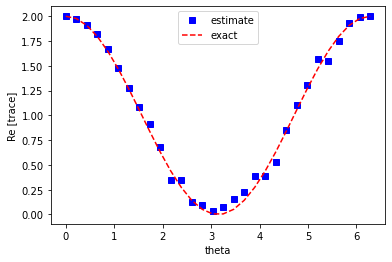

In [3]:
[estimates, actuals, theta] = computevales(500,30)
plt.plot(theta, estimates, 'bs', label = "estimate")
plt.plot(theta, actuals, 'r--', label = "exact")
plt.legend(loc="upper center")
plt.ylabel('Re [trace]')
plt.xlabel('theta')
plt.show()